### Chapter 12: Additional Problems in Image Processing

#### Ex. 3: Apply total variation denoising on an RGB image.

----

In [10]:
# Import các thư viện cần thiết
from skimage import io, img_as_float
from skimage.restoration import denoise_tv_chambolle
import matplotlib.pyplot as plt
import numpy as np

#### 1. Total Variation Denoising algorithms

In [ ]:
# Mở ảnh RPG và in ra kích thước ảnh 
img = img_as_float((io.imread('input/lena.jpg')))
print(img.shape) # RPG image

# Ảnh RPG có len(img.shape) = 3 and image.shape[2] = 3

(220, 220, 3)


- io.imread('input/lena.jpg'): Dùng hàm imread từ thư viện skimage.io để đọc ảnh từ đường dẫn 'input/lena.jpg'.
- img_as_float: Chuyển ảnh về kiểu dữ liệu float, tức là giá trị pixel sẽ nằm trong khoảng [0, 1].
- print(img.shape): in ra kích thước ảnh, nếu ảnh là ảnh 3 chiều và có 3 kênh màu (Đỏ, Xanh, Lam) thì đó là ảnh RPG

In [13]:
# Tạo phiên bản nhiễu của ảnh
noisy_img = img + 0.5 * img.std() * np.random.randn(*img.shape)

- Đoạn mã trên tạo ra phiên bản nhiễu của ảnh
- 0.5 * img.std() * np.random.randn(*img.shape) điều chỉnh mức độ nhiễu bằng cách nhân độ lệch chuẩn với giá trị ngẫu nhiên, sau đó thêm vào ảnh gốc img

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(220, 220, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


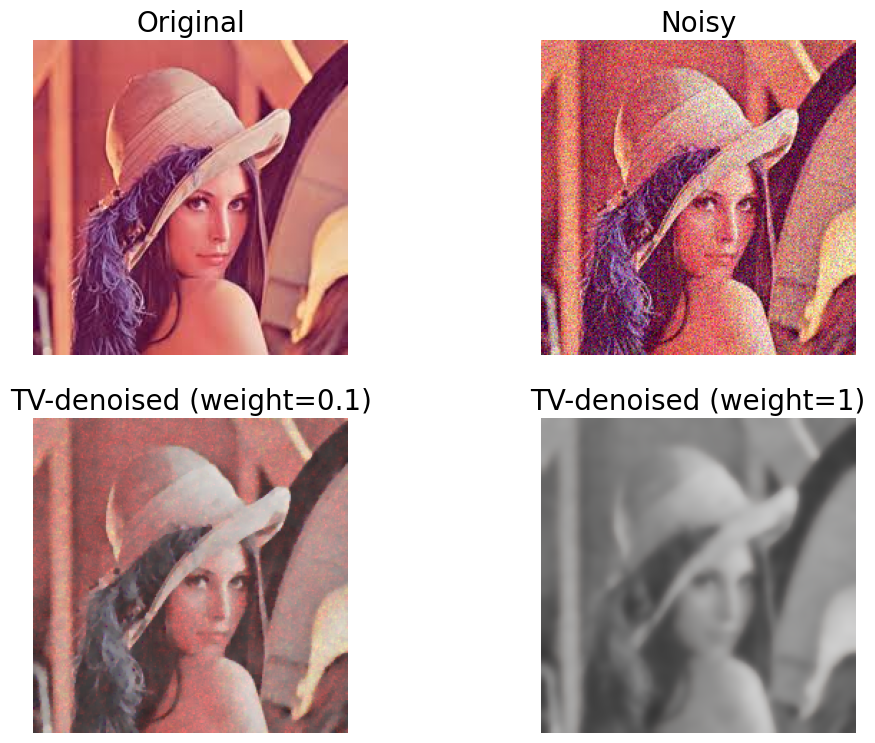

In [ ]:
# In kết quả 
plt.figure(figsize=(12, 9))
plt.gray()

# Ảnh gốc
plt.subplot(221)
plt.imshow(img)
plt.axis('off')
plt.title('Original', size=20)

# Ảnh nhiễu
plt.subplot(222)
plt.imshow(noisy_img)
plt.axis('off')
plt.title('Noisy', size=20)

# Ảnh đã được khử nhiễu với weight=0.1
denoised_img_1 = denoise_tv_chambolle(noisy_img, weight=0.1)
plt.subplot(223)
plt.imshow(denoised_img_1)
plt.axis('off')
plt.title('TV-denoised (weight=0.1)', size=20)

# Ảnh đã được khử nhiễu với weight=1
denoised_img_2 = denoise_tv_chambolle(noisy_img, weight=1)
plt.subplot(224)
plt.imshow(denoised_img_2)
plt.axis('off')
plt.title('TV-denoised (weight=1)', size=20)

plt.show()


#### 2.  Creating flat-texture cartoonish images with total variation denoising

In [14]:
# Import các thư viện cần thiết
from skimage import io
from skimage.restoration import denoise_tv_chambolle
import matplotlib.pyplot as plt

In [15]:
# Load the image
img = io.imread('input/lena.jpg') #RPG image
print(img.shape)

(220, 220, 3)


- img = io.imread('input/lena.jpg') : dùng thư viện skimage giúp đọc ảnh đầu vào với đường dẫn 'input/lena.jpg'
- print(img.shape): in ra kích thước của ảnh, nếu ảnh là ảnh 3 chiều và có 3 kênh màu (Đỏ, Xanh, Lam) thì đó là ảnh 3 màu

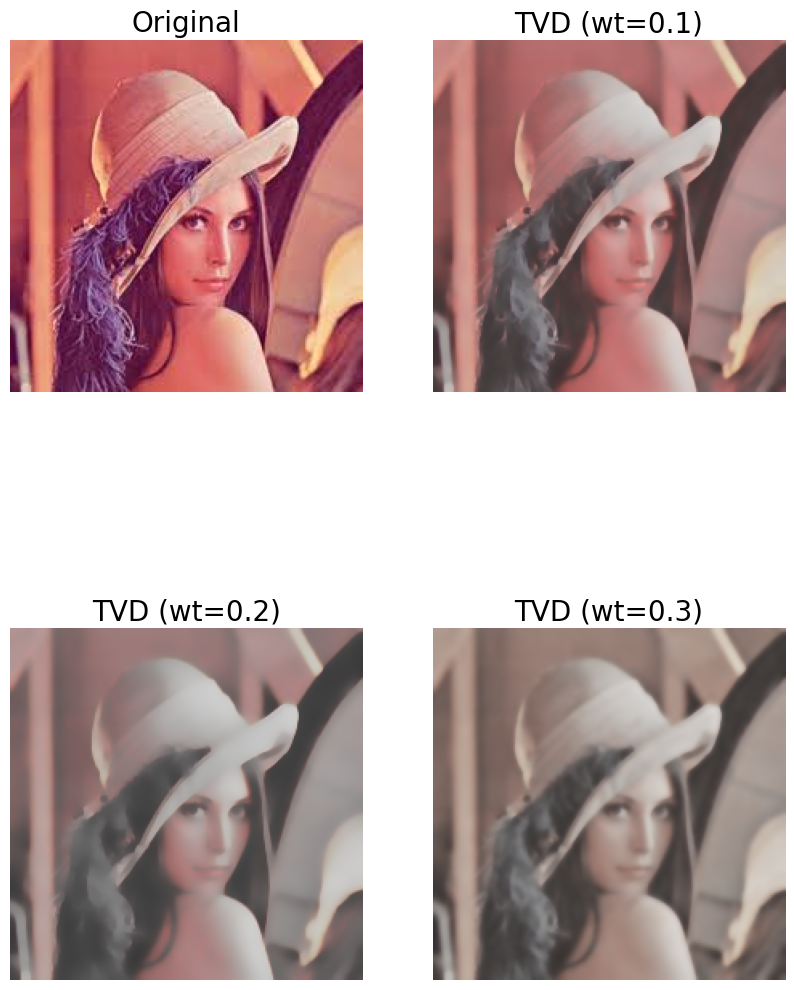

In [16]:
# Display the original and denoised images with different weights
plt.figure(figsize=(10, 14))

# Original image
plt.subplot(221)
plt.imshow(img)
plt.axis('off')
plt.title('Original', size=20)

# Denoised images with varying weights
weights = [0.1, 0.2, 0.3]
for i, weight in enumerate(weights, start=2):
    denoised_img = denoise_tv_chambolle(img, weight=weight)
    plt.subplot(2, 2, i)
    plt.imshow(denoised_img)
    plt.axis('off')
    plt.title(f'TVD (wt={weight})', size=20)

plt.show()
